In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data = pd.read_csv('/content/-Linear-Regression-One-Variable---Salary-Prediction/Experience-Salary.csv')

In [ ]:
data.head()

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


<Axes: xlabel='exp(in months)', ylabel='salary(in thousands)'>

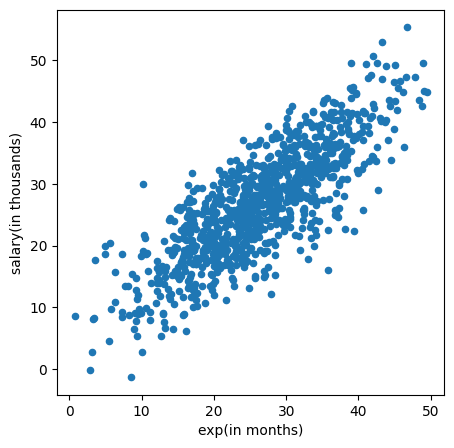

In [ ]:
#draw data to see points
data.plot(kind='scatter', x='exp(in months)', y='salary(in thousands)', figsize=(5,5))

In [ ]:
# Data scaling
#data = (data - data.mean())/data.std()
#data.head()

In [ ]:
# Add ones column
data.insert(0,"Ones",1)

In [ ]:
data.describe()

,Ones,exp(in months),salary(in thousands)
count,1000.0,1000.000000,1000.000000
mean,1.0,26.157825,26.722597
std,0.0,8.717091,8.844761
min,1.0,0.697594,-1.276342
25%,1.0,20.073600,20.531008
50%,1.0,25.875225,26.745576
75%,1.0,32.406986,32.615753
max,1.0,49.463222,55.297016


In [ ]:
cols = data.shape[1]
# Separate training data (X) from target variable (y)
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

#print('X: \n ',X.head())
#print('Y: \n ', y.head())

In [ ]:
# Convert dataframes into matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
weights = np.matrix(np.array([0,0]))
print('X', X.shape)
print('y', y.shape)
print('weights', weights.shape)

X (1000, 2)
y (1000, 1)
weights (1, 2)


In [ ]:
# cost functhion = (1/2m)∑(h(x) - y)^2
def compute_cost(X,y,weights):
  m = len(X)
  predicted = (X * weights.T)
  cost = np.sum(np.power((predicted-y),2))/(2*m)
  return cost

In [ ]:
print(compute_cost(X,y,weights))

396.1243836051067


In [ ]:
# GD function
# weight(j) = weight(j) -(1/m)∑(h(x) - y)
def gradient_descent(X,y,weights,learning_rate,iterations):
  temp = np.matrix(np.zeros(weights.shape))
  m = len(X)
  parameters = int(weights.ravel().shape[1])
  cost = np.zeros(iterations)

  for i in range(iterations):
    error = (X * weights.T) - y

    for j in range(parameters):
      term = np.multiply(error,X[:,j])
      temp[0,j] = weights[0,j] - ((learning_rate/m) * np.sum(term))

    weights = temp
    cost[i] = compute_cost(X,y,weights)

  return weights,cost


In [ ]:
# Initialize variable for learning rate and iterations
learning_rate = 0.0025
iterations = 10000

In [ ]:
# Perform GD to "fit" the model parameters
GD_weights, cost = gradient_descent(X,y,weights,learning_rate,iterations)
print(GD_weights)
print(cost[0:50])
print('*************************************************************************')
print(cost[9950:10000])
print('Final Cost using GD: ',compute_cost(X,y,GD_weights))


[[4.77224942 0.83752411]]
[325.44872762 267.86889234 220.9582696  182.73989297 151.60312076
 126.23575734 105.56875219  88.73114598  75.01336501  63.83731701
  54.7320281   47.31379419  41.27001014  36.34599542  32.3342609
  29.0657644   26.40278668  24.23312735  22.46537637  21.02506162
  19.85151043  18.89529252  18.1161369   17.48123461  16.9638561
  16.5422247   16.19859887  15.91852452  15.69022587  15.5041091
  15.35235815  15.2286052   15.12766239  15.04530314  14.97808404
  14.92319974  14.87836471  14.84171691  14.81173934  14.78719609
  14.76708026  14.75057153  14.73700157  14.7258259   14.71660092
  14.70896524  14.70262443  14.69733861  14.69291236  14.68918647]
*************************************************************************
[13.38607154 13.3860669  13.38606226 13.38605762 13.38605299 13.38604836
 13.38604373 13.3860391  13.38603447 13.38602985 13.38602523 13.38602061
 13.386016   13.38601139 13.38600678 13.38600217 13.38599756 13.38599296
 13.38598836 13.3859837

Text(0.5, 1.0, 'Best Fit Line: Predicted Salary Vs. Years Of Experience')

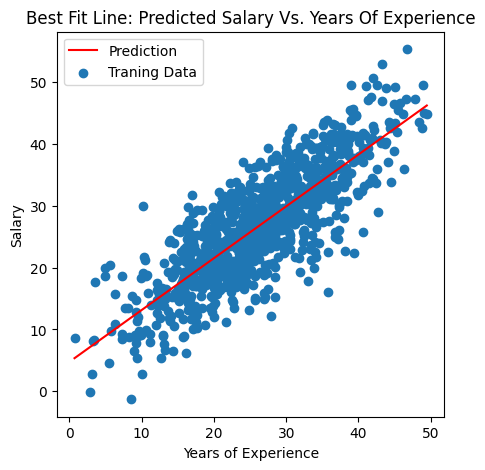

In [ ]:
# Get best fit line using Gradient Descent
x = np.linspace(data['exp(in months)'].min(),data['exp(in months)'].max(),100)
f = GD_weights[0,0] + (GD_weights[0,1] * x)

# Draw the line
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data['exp(in months)'],data['salary(in thousands)'],label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Years of Experience')
ax.set_ylabel('Salary')
ax.set_title('Best Fit Line: Predicted Salary Vs. Years Of Experience')


Text(0.5, 1.0, 'Error vs. Training Epoch')

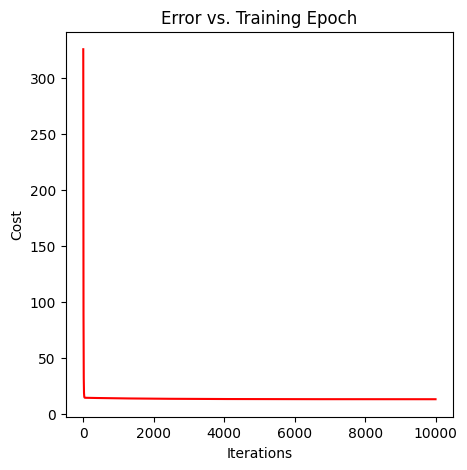

In [ ]:
# draw error graph
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iterations), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [ ]:
# optimum_weights = (XT * X)^(-1)*XT*y
def compute_normal_equation(X,y):
  first = np.linalg.inv(np.dot(X.T,X))
  second = np.dot(X.T,y)
  return np.dot(first,second)

In [ ]:
# Calculate the optimum weights using normal equation
optimum_weights = compute_normal_equation(X,y).T
print(optimum_weights)

[[5.19871856 0.82284666]]


In [ ]:
print('Optimum Weights using Normal Equation: ',optimum_weights)
print('Final Weights using Gradient Descent: ',GD_weights)

Optimum Weights using Normal Equation:  [[5.19871856 0.82284666]]
Final Weights using Gradient Descent:  [[4.77224942 0.83752411]]


In [ ]:
print('Cost using Normal Equation: ',compute_cost(X,y,optimum_weights))
print('Cost using Gradient Descent: ',compute_cost(X,y,GD_weights))


Cost using Normal Equation:  13.376765322834414
Cost using Gradient Descent:  13.385846839761179


Text(0.5, 1.0, 'Best Fit Line: Predicted Salary Vs. Years Of Experience')

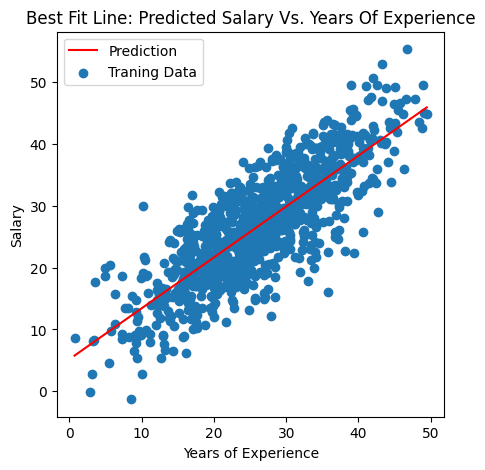

In [ ]:
# Get best fit line using Normal Equation
x = np.linspace(data['exp(in months)'].min(),data['exp(in months)'].max(),100)
f = optimum_weights[0,0] + (optimum_weights[0,1] * x)

# Draw the line
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data['exp(in months)'],data['salary(in thousands)'],label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Years of Experience')
ax.set_ylabel('Salary')
ax.set_title('Best Fit Line: Predicted Salary Vs. Years Of Experience')